In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [69]:
data = pd.read_csv(r"C:\Users\cxoox\Desktop\filtered_data\nsb_weather_merged.csv")

In [70]:
data.head()

,Date,Max Night Sky Brightness (MPSAS),Min Night Sky Brightness (Non-zero) (MPSAS),Mean Night Sky Brightness (Excluded zero) (MPSAS),Daily Maximum Hong Kong Heat Index,Daily Mean Hong Kong Heat Index,Daily Mean Wet Bulb Temperature (°C),Daily Mean Dew Point Temperature (°C),Daily Mean Amount of Cloud,Daily Mean Pressure (hPa),...,Daily Mean Temperature (°C),Daily Global Solar Radiation (MJ/m2),Daily Total Bright Sunshine (hours),Daily Mean Wind Speed (m/s),Sun Rise,Sun Transit,Sun Set,Moon Rise,Moon Transit,Moon Set
0,2022-01-01,16.71,9.03,15.205000,15.4,17.0,14.2,12.2,68.0,1024.4,...,16.7,7.30,1.6,7.9,07:03,12:27,17:51,05:12,10:44,16:14
1,2022-01-02,17.49,7.82,15.688571,17.2,19.6,15.0,12.8,10.0,1022.5,...,17.8,15.52,9.5,5.4,07:03,12:27,17:51,06:22,11:50,17:17
2,2022-01-03,17.54,7.87,15.614286,16.9,18.7,15.2,13.5,27.0,1021.1,...,17.5,15.15,8.0,9.6,07:03,12:28,17:52,07:29,12:56,18:24
3,2022-01-04,17.74,8.02,15.472143,17.1,19.1,15.5,13.1,49.0,1019.6,...,18.6,16.46,8.7,11.5,07:04,12:28,17:53,08:30,14:00,19:33
4,2022-01-05,16.87,8.11,14.589286,19.1,21.4,16.9,14.7,50.0,1017.3,...,20.1,16.78,8.8,8.2,07:04,12:29,17:53,09:23,14:59,20:39


In [71]:
#Extract data per column
data['Date'] = pd.to_datetime(data['Date'])
date=data["Date"]
max_nsb = data["Max Night Sky Brightness (MPSAS)"]
min_nsb = data["Min Night Sky Brightness (Non-zero) (MPSAS)"]
mean_nsb = data["Mean Night Sky Brightness (Excluded zero) (MPSAS)"]
daily_max_hi = data["Daily Maximum Hong Kong Heat Index"]
daily_mean_hi = data["Daily Mean Hong Kong Heat Index"]
daily_mean_wbtemp = data["Daily Mean Wet Bulb Temperature (°C)"]
daily_mean_dptemp = data["Daily Mean Dew Point Temperature (°C)"]
daily_mean_cloud = data["Daily Mean Amount of Cloud"]
daily_mean_press = data["Daily Mean Pressure (hPa)"]
daily_total_eva = data["Daily Total Evaporation (mm)"]
daily_total_rain = data["Daily Total Rainfall (mm)"]
daily_mean_rel_humid = data["Daily Mean Relative Humidity (%)"]
daily_max_temp = data["Daily Maximum Temperature (°C)"]
daily_min_temp = data["Daily Minimum Temperature (°C)"]
daily_mean_temp = data["Daily Mean Temperature (°C)"]
daily_gloSR = data["Daily Global Solar Radiation (MJ/m2)"]
daily_total_BS = data["Daily Total Bright Sunshine (hours)"]
daily_mean_WS = data["Daily Mean Wind Speed (m/s)"]

data["Sun Rise"] = pd.to_datetime(data["Sun Rise"], format='%H:%M')
sun_rise = data["Sun Rise"]
data["Sun Transit"] = pd.to_datetime(data["Sun Transit"] , format='%H:%M')
sun_transit = data["Sun Transit"]
data["Sun Set"] = pd.to_datetime(data["Sun Set"], format='%H:%M')
sun_set = data["Sun Set"]
data["Moon Rise"] = pd.to_datetime(data["Moon Rise"], format='%H:%M')
moon_rise = data["Moon Rise"]
data["Moon Transit"] = pd.to_datetime(data["Moon Transit"], format='%H:%M')
moon_transit = data["Moon Transit"]
data["Moon Set"] = pd.to_datetime(data["Moon Set"], format='%H:%M')
moon_set = data["Moon Set"]

In [72]:
data["Moon Set"].head()

0   1900-01-01 16:14:00
1   1900-01-01 17:17:00
2   1900-01-01 18:24:00
3   1900-01-01 19:33:00
4   1900-01-01 20:39:00
Name: Moon Set, dtype: datetime64[ns]

## Filter the data of 2023

In [73]:
#set up variable for filtering
yr2023 = (data['Date'] >= '2023-01-01') & (data['Date'] < '2023-12-31')
#filter each variable
yr2023_date = date[yr2023]
yr2023_max_nsb = max_nsb[yr2023]
yr2023_min_nsb = min_nsb[yr2023]
yr2023_mean_nsb = mean_nsb[yr2023]
yr2023_daily_max_hi = daily_max_hi[yr2023]
yr2023_daily_mean_hi = daily_mean_hi[yr2023]
yr2023_daily_mean_wbtemp = daily_mean_wbtemp[yr2023]
yr2023_daily_mean_dptemp = daily_mean_dptemp[yr2023]
yr2023_daily_mean_cloud = daily_mean_cloud[yr2023]
yr2023_daily_mean_press = daily_mean_press[yr2023]
yr2023_daily_total_eva = daily_total_eva[yr2023]
yr2023_daily_total_rain = daily_total_rain[yr2023]
yr2023_daily_mean_rel_humid = daily_mean_rel_humid[yr2023]
yr2023_daily_max_temp = daily_max_temp[yr2023]
yr2023_daily_min_temp = daily_min_temp[yr2023]
yr2023_daily_mean_temp = daily_mean_temp[yr2023]
yr2023_daily_gloSR = daily_gloSR[yr2023]
yr2023_daily_total_BS = daily_total_BS[yr2023]
yr2023_daily_mean_WS = daily_mean_WS[yr2023]
yr2023_sun_rise = sun_rise[yr2023]
yr2023_sun_transit = sun_transit[yr2023]
yr2023_sun_set = sun_set[yr2023]
yr2023_moon_rise = moon_rise[yr2023]
yr2023_moon_transit = moon_transit[yr2023]
yr2023_moon_set = moon_set[yr2023]

## Plot the Graph

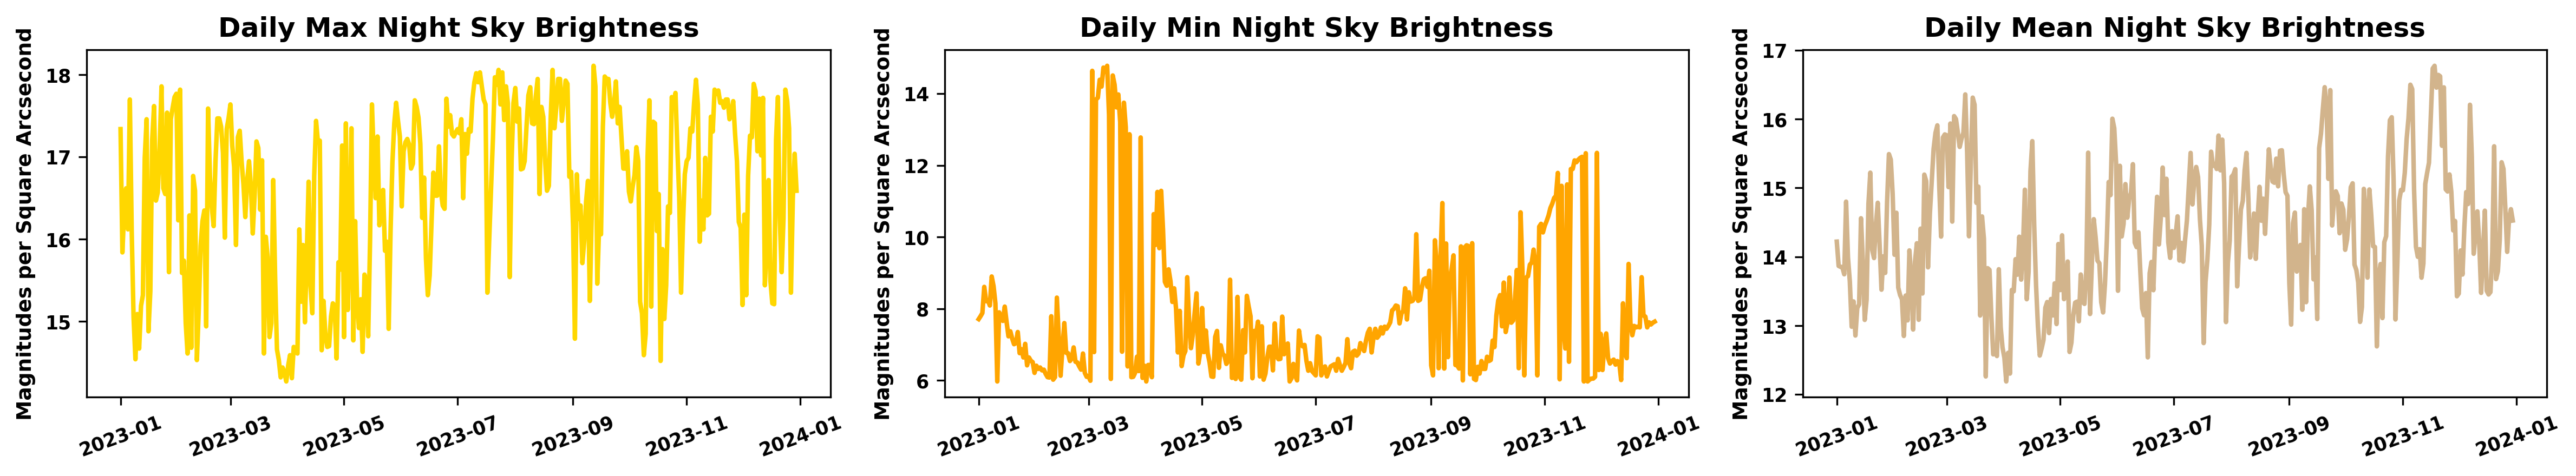

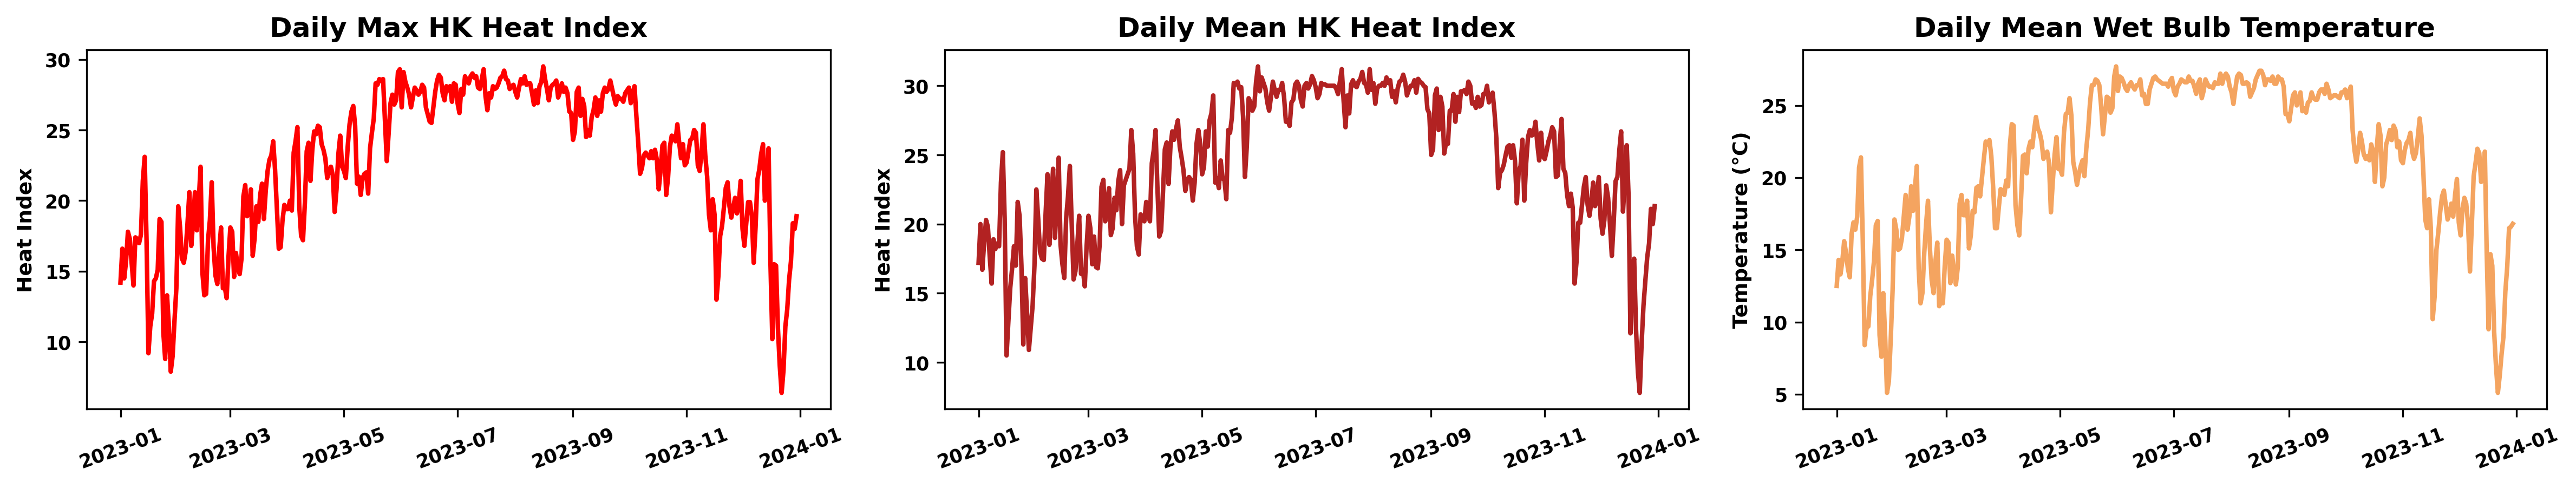

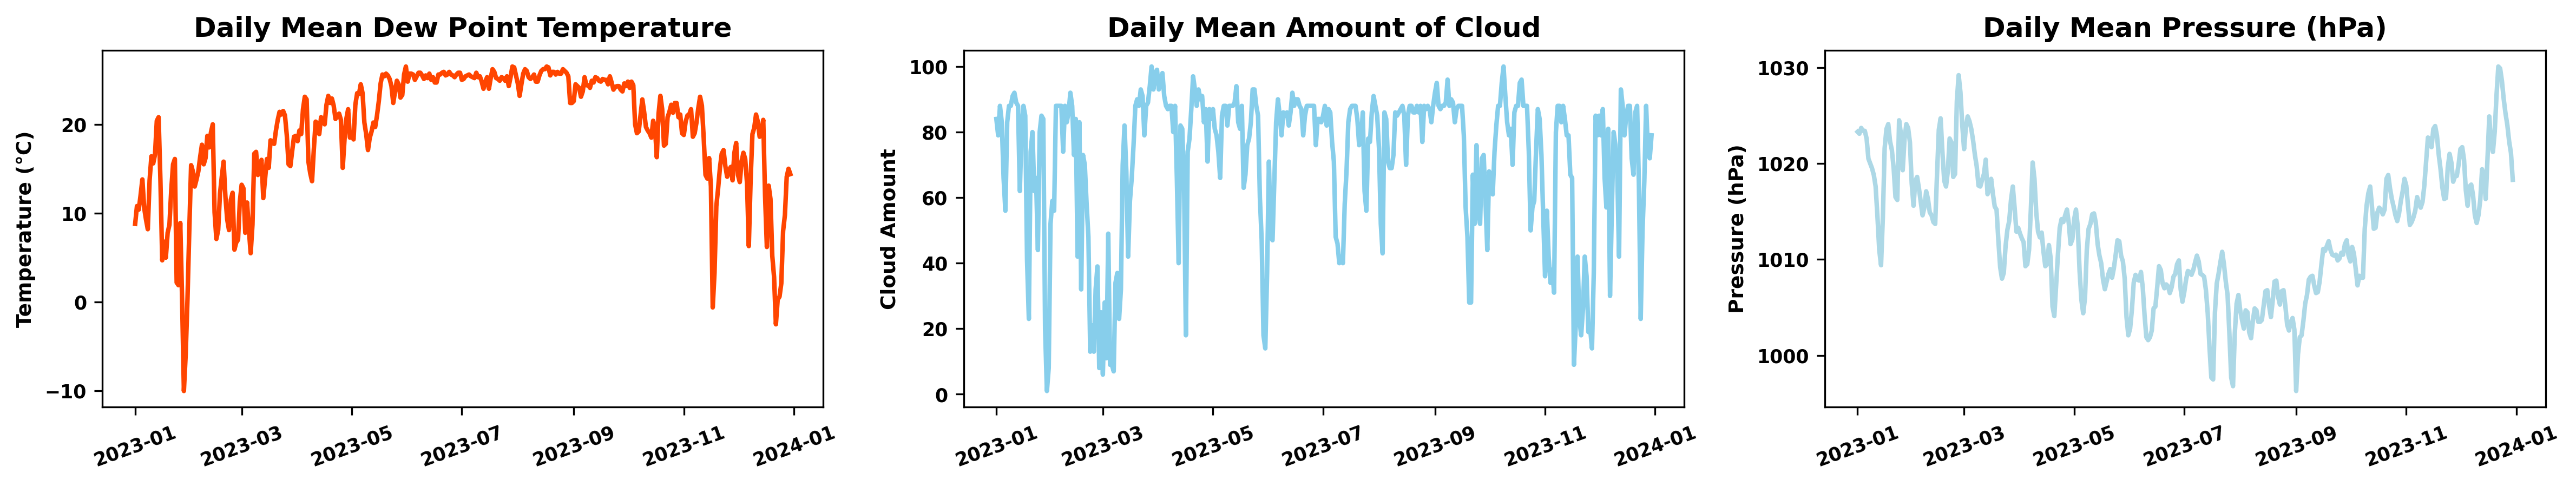

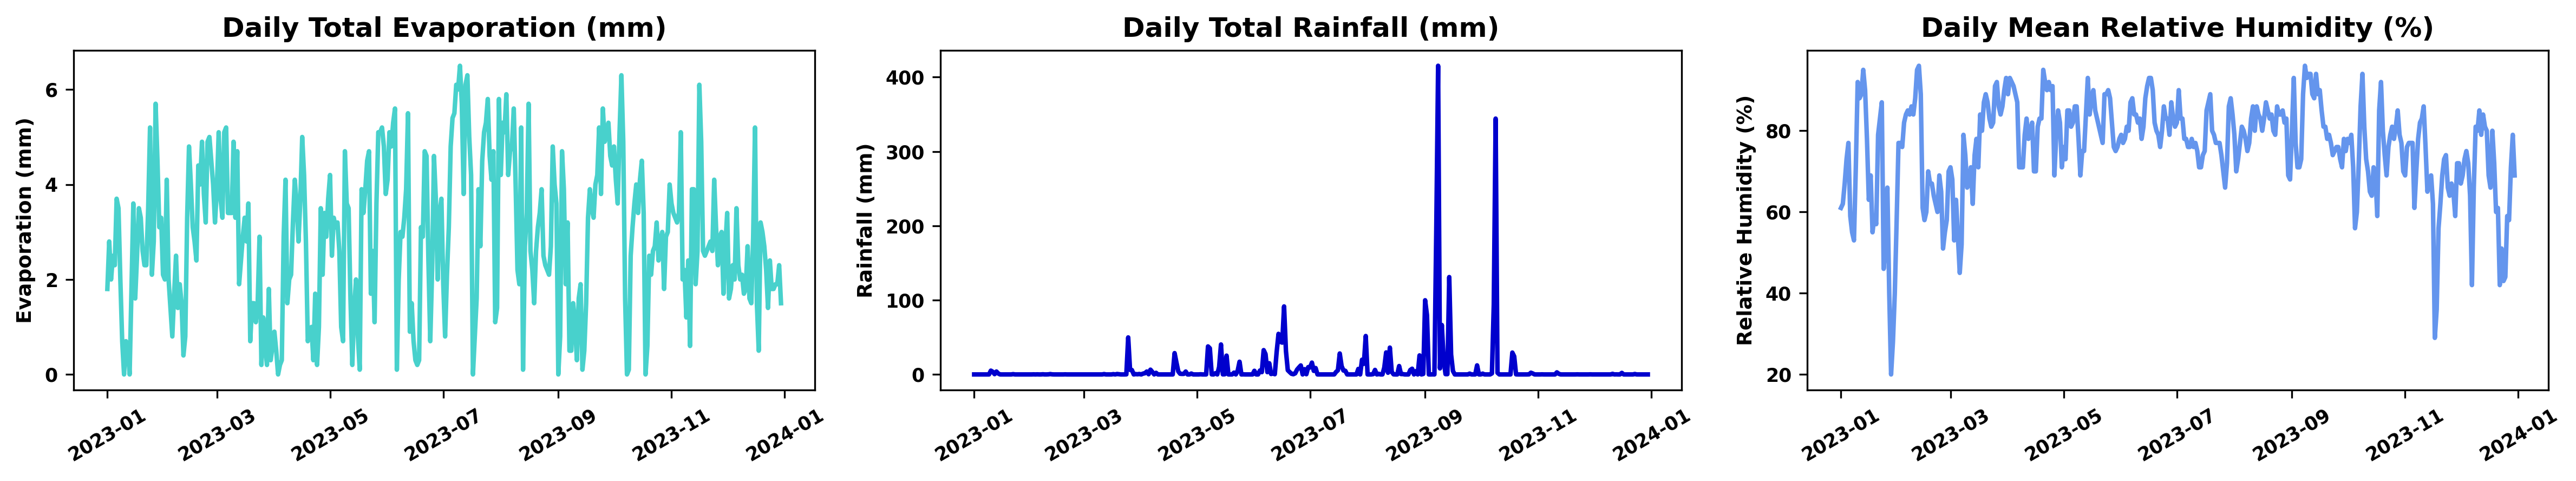

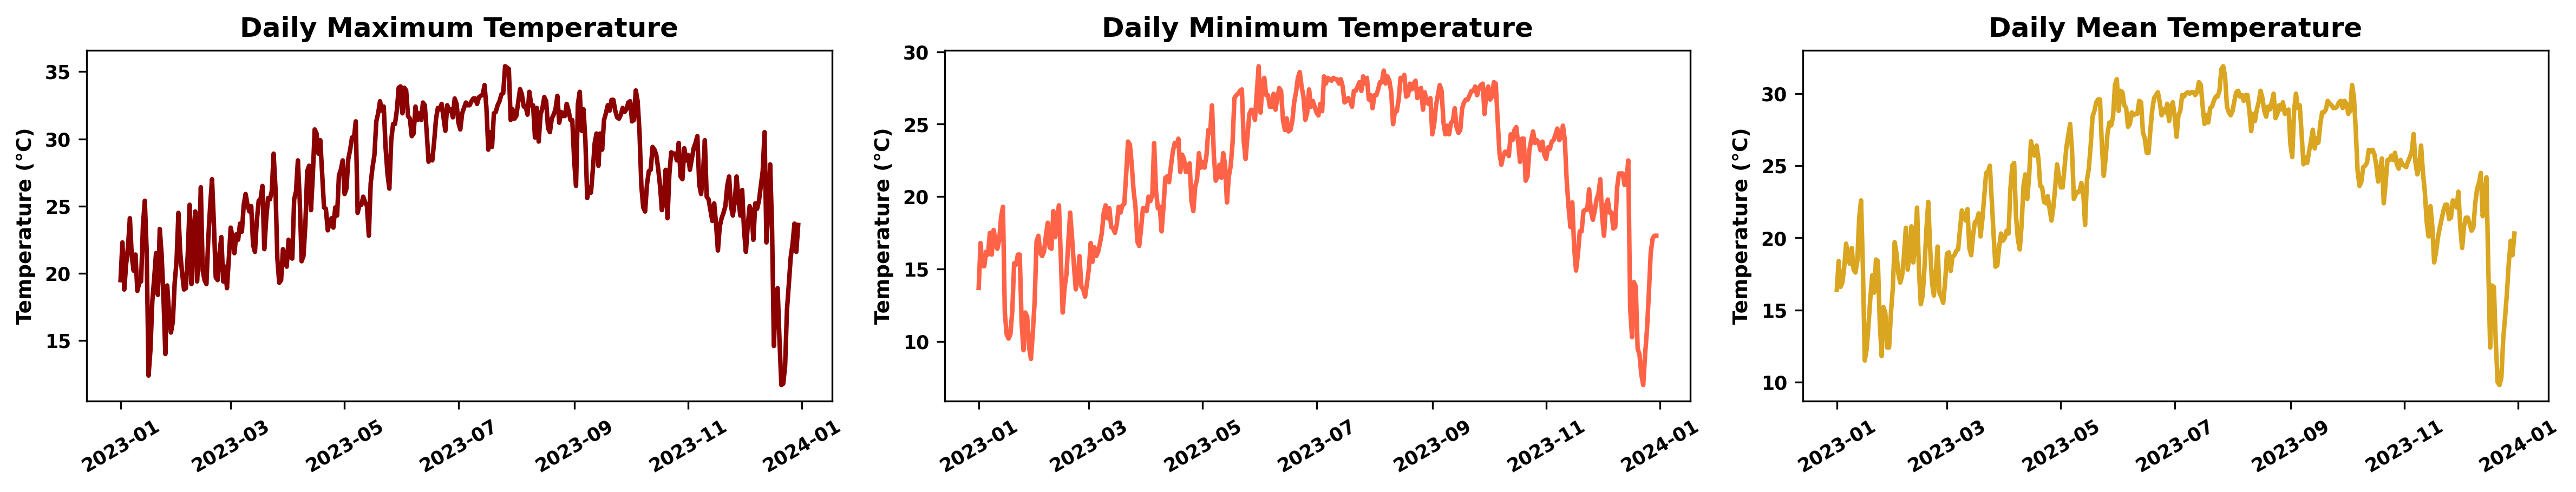

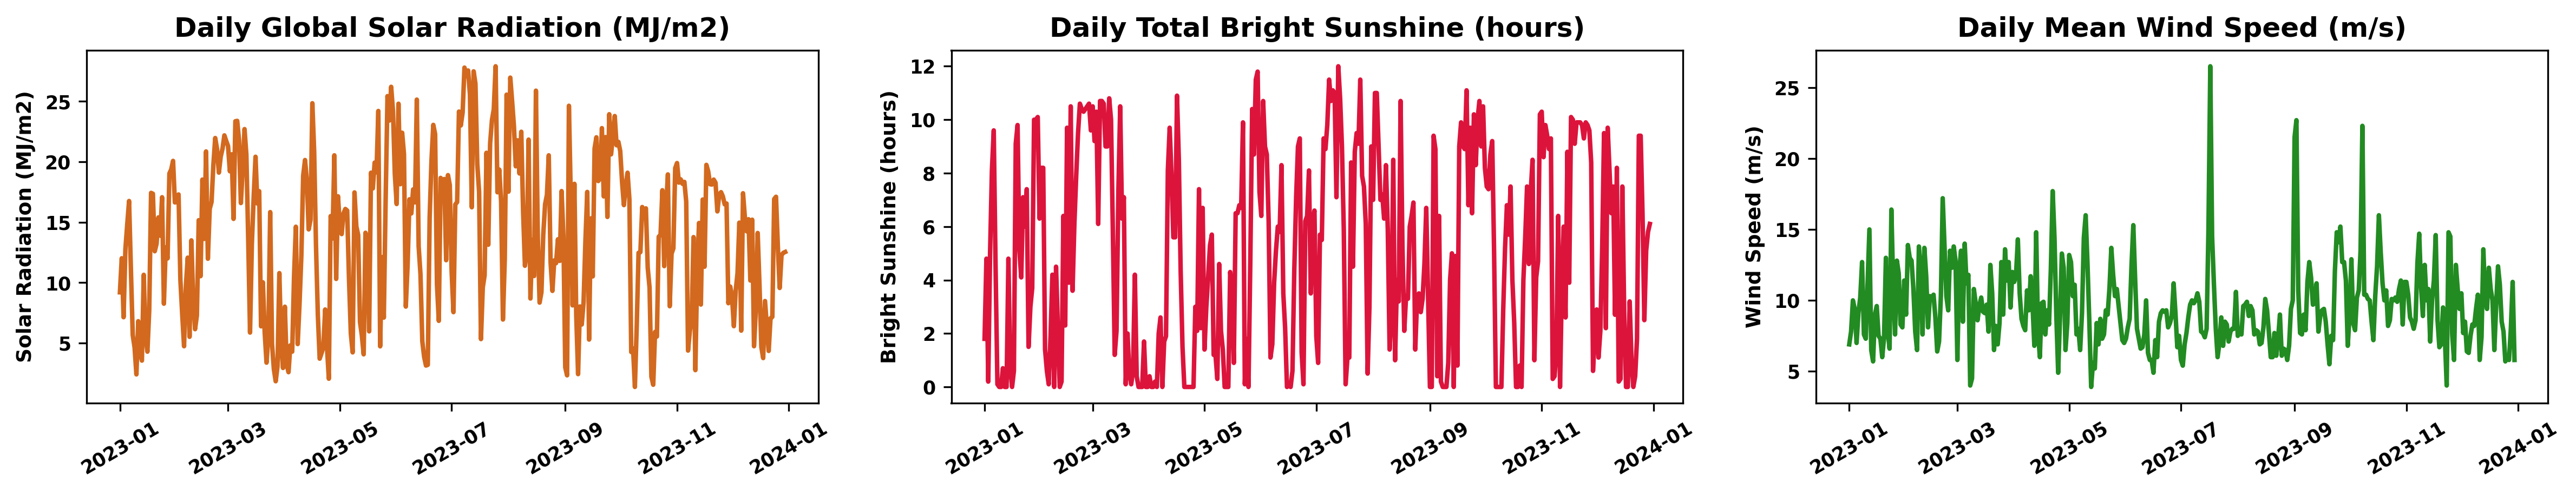

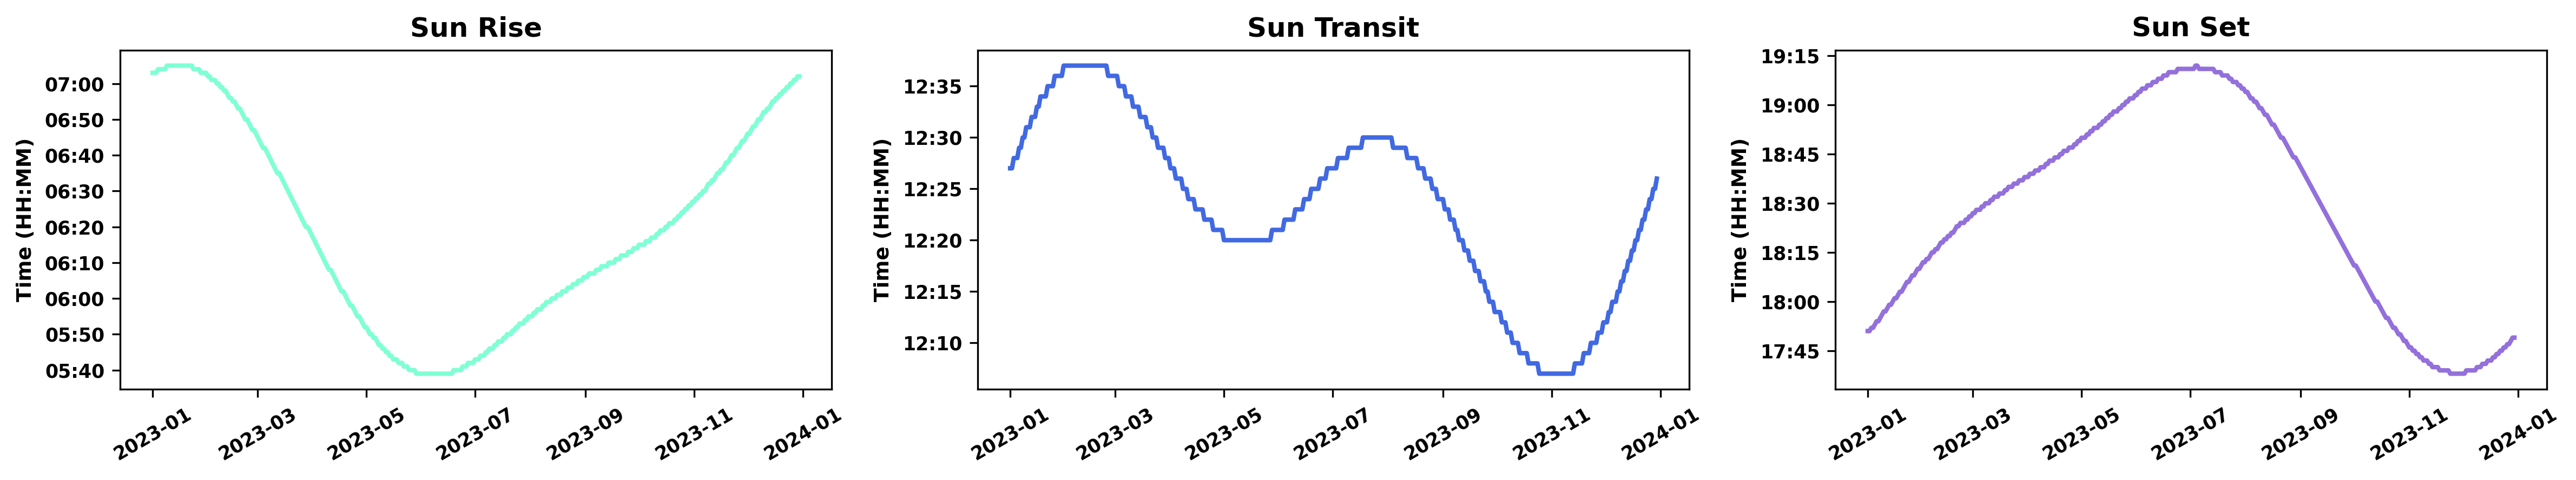

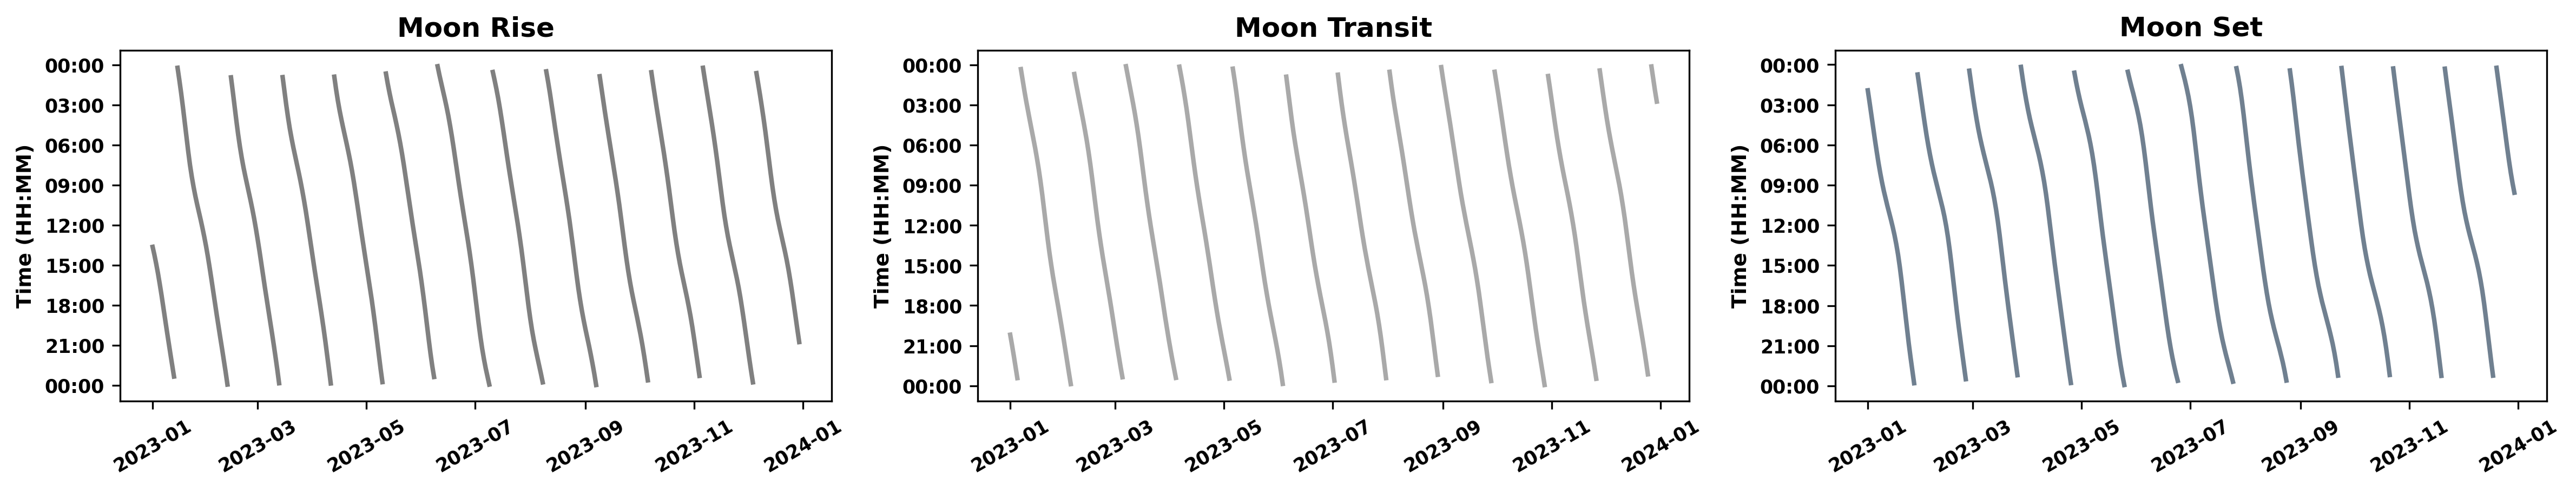

In [81]:
#figure1
plt.figure(figsize=(16, 8), dpi=300)
plt.subplot(3,3,1)
plt.plot(yr2023_date, yr2023_max_nsb, linewidth=2, color='gold')
plt.title("Daily Max Night Sky Brightness", fontsize=12, fontweight='heavy')
plt.ylabel("Magnitudes per Square Arcsecond", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure2
plt.subplot(3,3,2)
plt.plot(yr2023_date, yr2023_min_nsb, linewidth=2, color='orange')
plt.title("Daily Min Night Sky Brightness", fontsize=12, fontweight='heavy')
plt.ylabel("Magnitudes per Square Arcsecond", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure3
plt.subplot(3,3,3)
plt.plot(yr2023_date, yr2023_mean_nsb, linewidth=2, color='tan')
plt.title("Daily Mean Night Sky Brightness", fontsize=12, fontweight='heavy')
plt.ylabel("Magnitudes per Square Arcsecond", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

plt.tight_layout()
plt.savefig('1-3.svg', dpi=300, bbox_inches='tight')
plt.show()

#figure4
plt.figure(figsize=(16, 8), dpi=300)
plt.subplot(3,3,4)
plt.plot(yr2023_date, yr2023_daily_max_hi, linewidth=2, color='red')
plt.title("Daily Max HK Heat Index", fontsize=12, fontweight='heavy')
plt.ylabel("Heat Index", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure5
plt.subplot(3,3,5)
plt.plot(yr2023_date, yr2023_daily_mean_hi, linewidth=2, color='firebrick')
plt.title("Daily Mean HK Heat Index", fontsize=12, fontweight='heavy')
plt.ylabel("Heat Index", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure6
plt.subplot(3,3,6)
plt.plot(yr2023_date, yr2023_daily_mean_wbtemp, linewidth=2, color='sandybrown')
plt.title("Daily Mean Wet Bulb Temperature", fontsize=12, fontweight='heavy')
plt.ylabel("Temperature (°C)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

plt.tight_layout()
plt.savefig('4-6.svg', dpi=300, bbox_inches='tight')
plt.show()

#figure7
plt.figure(figsize=(16, 8), dpi=300)
plt.subplot(3,3,7)
plt.plot(yr2023_date, yr2023_daily_mean_dptemp, linewidth=2, color='orangered')
plt.title("Daily Mean Dew Point Temperature", fontsize=12, fontweight='heavy')
plt.ylabel("Temperature (°C)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure8
plt.subplot(3,3,8)
plt.plot(yr2023_date, yr2023_daily_mean_cloud, linewidth=2, color='skyblue')
plt.title("Daily Mean Amount of Cloud", fontsize=12, fontweight='heavy')
plt.ylabel("Cloud Amount", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure9
plt.subplot(3,3,9)
plt.plot(yr2023_date, yr2023_daily_mean_press, linewidth=2, color='lightblue')
plt.title("Daily Mean Pressure (hPa)", fontsize=12, fontweight='heavy')
plt.ylabel("Pressure (hPa)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=20, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

plt.tight_layout()
plt.savefig('7-9.svg', dpi=300, bbox_inches='tight')
plt.show()

#figure10
plt.figure(figsize=(16, 8), dpi=300)
plt.subplot(3,3,1)
plt.plot(yr2023_date, yr2023_daily_total_eva, linewidth=2, color='mediumturquoise')
plt.title("Daily Total Evaporation (mm)", fontsize=12, fontweight='heavy')
plt.ylabel("Evaporation (mm)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure11
plt.subplot(3,3,2)
plt.plot(yr2023_date, yr2023_daily_total_rain, linewidth=2, color='mediumblue')
plt.title("Daily Total Rainfall (mm)", fontsize=12, fontweight='heavy')
plt.ylabel("Rainfall (mm)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure12
plt.subplot(3,3,3)
plt.plot(yr2023_date, yr2023_daily_mean_rel_humid, linewidth=2, color='cornflowerblue')
plt.title("Daily Mean Relative Humidity (%)", fontsize=12, fontweight='heavy')
plt.ylabel("Relative Humidity (%)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

plt.tight_layout()
plt.savefig('10-12.svg', dpi=300, bbox_inches='tight')
plt.show()

#figure13
plt.figure(figsize=(16, 8), dpi=300)
plt.subplot(3,3,4)
plt.plot(yr2023_date, yr2023_daily_max_temp, linewidth=2, color='darkred')
plt.title("Daily Maximum Temperature", fontsize=12, fontweight='heavy')
plt.ylabel("Temperature (°C)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure14
plt.subplot(3,3,5)
plt.plot(yr2023_date, yr2023_daily_min_temp, linewidth=2, color='tomato')
plt.title("Daily Minimum Temperature", fontsize=12, fontweight='heavy')
plt.ylabel("Temperature (°C)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure15
plt.subplot(3,3,6)
plt.plot(yr2023_date, yr2023_daily_mean_temp, linewidth=2, color='goldenrod')
plt.title("Daily Mean Temperature", fontsize=12, fontweight='heavy')
plt.ylabel("Temperature (°C)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

plt.tight_layout()
plt.savefig('13-15.svg', dpi=300, bbox_inches='tight')
plt.show()

#figure16
plt.figure(figsize=(16, 8), dpi=300)
plt.subplot(3,3,7)
plt.plot(yr2023_date, yr2023_daily_gloSR, linewidth=2, color='chocolate')
plt.title("Daily Global Solar Radiation (MJ/m2)", fontsize=12, fontweight='heavy')
plt.ylabel("Solar Radiation (MJ/m2)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure17
plt.subplot(3,3,8)
plt.plot(yr2023_date, yr2023_daily_total_BS, linewidth=2, color='crimson')
plt.title("Daily Total Bright Sunshine (hours)", fontsize=12, fontweight='heavy')
plt.ylabel("Bright Sunshine (hours)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure18
plt.subplot(3,3,9)
plt.plot(yr2023_date, yr2023_daily_mean_WS, linewidth=2, color='forestgreen')
plt.title("Daily Mean Wind Speed (m/s)", fontsize=12, fontweight='heavy')
plt.ylabel("Wind Speed (m/s)", fontsize=9, fontweight='heavy')
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

plt.tight_layout()
plt.savefig('16-18.svg', dpi=300, bbox_inches='tight')
plt.show()

#figure19
plt.figure(figsize=(16, 8), dpi=300)
plt.subplot(3,3,1)
plt.plot(yr2023_date, yr2023_sun_rise, linewidth=2, color='aquamarine')
plt.title("Sun Rise", fontsize=12, fontweight='heavy')
plt.ylabel("Time (HH:MM)", fontsize=9, fontweight='heavy')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure20
plt.subplot(3,3,2)
plt.plot(yr2023_date, yr2023_sun_transit, linewidth=2, color='royalblue')
plt.title("Sun Transit", fontsize=12, fontweight='heavy')
plt.ylabel("Time (HH:MM)", fontsize=9, fontweight='heavy')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure21
plt.subplot(3,3,3)
plt.plot(yr2023_date, yr2023_sun_set, linewidth=2, color='mediumpurple')
plt.title("Sun Set", fontsize=12, fontweight='heavy')
plt.ylabel("Time (HH:MM)", fontsize=9, fontweight='heavy')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

plt.tight_layout()
plt.savefig('19-21.svg', dpi=300, bbox_inches='tight')
plt.show()

#figure22
plt.figure(figsize=(16, 8), dpi=300)
plt.subplot(3,3,4)
plt.plot(yr2023_date, yr2023_moon_rise, linewidth=2, color='grey')
plt.title("Moon Rise", fontsize=12, fontweight='heavy')
plt.ylabel("Time (HH:MM)", fontsize=9, fontweight='heavy')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().invert_yaxis()
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure23
plt.subplot(3,3,5)
plt.plot(yr2023_date, yr2023_moon_transit, linewidth=2, color='darkgrey')
plt.title("Moon Transit", fontsize=12, fontweight='heavy')
plt.ylabel("Time (HH:MM)", fontsize=9, fontweight='heavy')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().invert_yaxis()
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

#figure24
plt.subplot(3,3,6)
plt.plot(yr2023_date, yr2023_moon_set, linewidth=2, color='slategrey')
plt.title("Moon Set", fontsize=12, fontweight='heavy')
plt.ylabel("Time (HH:MM)", fontsize=9, fontweight='heavy')
plt.gca().yaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().invert_yaxis()
plt.xticks(rotation=30, fontweight='heavy', fontsize='small')
plt.yticks(fontweight='heavy', fontsize='small')

plt.tight_layout()
plt.savefig('22-24.svg', dpi=300, bbox_inches='tight')
plt.show()